#Like Count Regression Task

In [52]:
import numpy as np
import pandas as pd
import json
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
import seaborn as sns
from pprint import pprint

# Train Dataset Analysis

In [53]:
train_file_path = "/content/training-dataset.jsonl"

train_data = []
with open(train_file_path, "r", encoding="utf-8") as file:
    for line in file:
        try:
            json_object = json.loads(line.strip())
            train_data.append(json_object)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")

df = pd.DataFrame(train_data)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()


,profile,posts
0,"{'username': 'deparmedya', 'id': '3170700063',...",[{'caption': 'Cumhuriyetimizin 100.yılı kutlu ...
1,"{'username': 'beyazyakaliyiz', 'id': '86344574...",[{'caption': 'Bu diyaloğun yaşanmadığı bir onl...
2,"{'username': 'kafesfirin', 'id': '266439571', ...",[{'caption': 'Bugün bir fincan köpüklü Türk ka...
3,"{'username': 'vimerang', 'id': '2367195567', '...",[{'caption': 'Saygı ve özlemle🖤 #atatürk #10k...
4,"{'username': 'totalenergies_istasyonlari', 'id...",[{'caption': 'Başöğretmenimiz Gazi Mustafa Kem...


In [54]:
profile_df = pd.json_normalize(df['profile'])

# Merge profile fields with top-level fields (except 'profile' which we've flattened)
user_df = pd.concat([df.drop(columns=['profile']), profile_df], axis=1)

user_df.head()

,posts,username,id,full_name,biography,category_name,post_count,follower_count,following_count,is_business_account,is_private,is_verified,highlight_reel_count,bio_links,entities,ai_agent_type,fb_profile_biolink,restricted_by_viewer,country_block,eimu_id,external_url,fbid,has_clips,hide_like_and_view_counts,is_professional_account,is_supervision_enabled,is_guardian_of_viewer,is_supervised_by_viewer,is_supervised_user,is_embeds_disabled,is_joined_recently,business_address_json,business_contact_method,business_email,business_phone_number,business_category_name,overall_category_name,category_enum,is_verified_by_mv4b,is_regulated_c18,profile_pic_url,should_show_category,should_show_public_contacts,show_account_transparency_details,profile_picture_base64
0,[{'caption': 'Cumhuriyetimizin 100.yılı kutlu ...,deparmedya,3170700063,Depar Medya,#mediaplanning #mediabuying #sosyalmedya,Local business,NaN,1167,192,True,False,False,6,"""[{'title': '', 'lynx_url': 'https://l.instagr...",#mediaplanning #mediabuying #sosyalmedya,None,None,None,False,110133017051179,http://www.deparmedya.com/,17841403241896337,True,False,True,False,False,False,False,False,False,"""{\""city_name\"": null, \""city_id\"": null, \""la...",CALL,None,None,None,None,LOCAL,False,False,https://instagram.fsaw2-3.fna.fbcdn.net/v/t51....,True,True,True,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
1,[{'caption': 'Bu diyaloğun yaşanmadığı bir onl...,beyazyakaliyiz,8634457436,Selam Beyaz Yakalı,Beyaz yakalıların dünyasına hoşgeldiniz 😀😀😀,Personal blog,NaN,1265,665,True,False,False,0,"""[{'title': '', 'lynx_url': 'https://l.instagr...",Beyaz yakalıların dünyasına hoşgeldiniz 😀😀😀,None,None,None,False,109046377161056,http://yinemipazartesi.wordpress.com/,17841408443109307,False,False,True,False,False,False,False,False,False,"""{\""city_name\"": null, \""city_id\"": null, \""la...",UNKNOWN,None,None,None,None,PERSONAL_BLOG,False,False,https://instagram.fist6-1.fna.fbcdn.net/v/t51....,True,True,True,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
2,[{'caption': 'Bugün bir fincan köpüklü Türk ka...,kafesfirin,266439571,KAFES FIRIN,📍Söğütözü📍FTZ AVM\n🛒Ankara macro▲center v...,Brand,NaN,11997,17,True,False,False,15,"""[{'title': '', 'lynx_url': 'https://l.instagr...",📍Söğütözü📍FTZ AVM\n🛒Ankara macro▲center v...,None,None,None,False,111783696881731,http://www.kafesfirin.com/,17841400227134163,True,False,True,False,False,False,False,False,False,"""{\""city_name\"": null, \""city_id\"": null, \""la...",CALL,None,None,None,None,BRAND,False,False,https://instagram.fada1-13.fna.fbcdn.net/v/t51...,True,True,True,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
3,[{'caption': 'Saygı ve özlemle🖤 #atatürk #10k...,vimerang,2367195567,Vimerang,Dijital İletişim Yönetimi🎬info@vimerang.comq,None,NaN,2321,454,True,False,False,11,"""[{'title': '', 'lynx_url': 'https://l.instagr...",Dijital İletişim Yönetimi🎬info@vimerang.comq,None,None,None,False,107818887285254,http://vimerang.com/,17841402267035899,True,True,True,False,False,False,False,False,False,"""{\""city_name\"": \""Istanbul, Turkey\"", \""city_...",CALL,None,None,Creators & Celebrities,None,VIDEO_CREATOR,False,False,https://instagram.fist19-1.fna.fbcdn.net/v/t51...,True,True,True,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
4,[{'caption': 'Başöğretmenimiz Gazi Mustafa Kem...,totalenergies_istasyonlari,7066643793,TotalEnergies İstasyonları,TotalEnergies İstasyonları resmi Instagram hes...,Energy Company,NaN,28025,4,True,False,False,10,"""[{'title': '', 'lynx_url': 'https://l.instagr...",TotalEnergies İstasyonları resmi Instagram hes...,None,None,None,False,112204746839186,https://bit.ly/45XDUDr,17841407073803330,True,False,True,False,False,False,False,False,False,"""{\""city_name\"": null, \""city_id\"": null, \""la...",CALL,None,None,None,None,ENERGY_COMPANY,False,False,https://instagram.fsaw2-1.fna.fbcdn.net/v/t51....,True,True,True,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...


In [55]:
# 1. Explode the 'posts' list so each post is its own row
posts_exploded = df.explode('posts', ignore_index=True)

# 2. Flatten the 'posts' dictionary into columns
posts_exploded = pd.concat(
    [posts_exploded.drop(columns=['posts']),
     pd.json_normalize(posts_exploded['posts'])],
    axis=1
)

# 3. Flatten the 'profile' dictionary as well
profile_flat_exploded = pd.json_normalize(posts_exploded['profile'])

# 4. Merge the flattened profile columns, dropping the original 'profile' column
posts_exploded = pd.concat(
    [posts_exploded.drop(columns=['profile']), profile_flat_exploded],
    axis=1
)

# Check the DataFrame
posts_exploded.head()


,caption,comments_count,id,like_count,media_type,media_url,timestamp,username,id,full_name,biography,category_name,post_count,follower_count,following_count,is_business_account,is_private,is_verified,highlight_reel_count,bio_links,entities,ai_agent_type,fb_profile_biolink,restricted_by_viewer,country_block,eimu_id,external_url,fbid,has_clips,hide_like_and_view_counts,is_professional_account,is_supervision_enabled,is_guardian_of_viewer,is_supervised_by_viewer,is_supervised_user,is_embeds_disabled,is_joined_recently,business_address_json,business_contact_method,business_email,business_phone_number,business_category_name,overall_category_name,category_enum,is_verified_by_mv4b,is_regulated_c18,profile_pic_url,should_show_category,should_show_public_contacts,show_account_transparency_details,profile_picture_base64
0,Cumhuriyetimizin 100.yılı kutlu olsun♾️🇹🇷,0.0,17990918969458720,6.0,IMAGE,https://scontent-sof1-2.cdninstagram.com/v/t51...,2023-10-29 09:12:30,deparmedya,3170700063,Depar Medya,#mediaplanning #mediabuying #sosyalmedya,Local business,NaN,1167,192,True,False,False,6,"""[{'title': '', 'lynx_url': 'https://l.instagr...",#mediaplanning #mediabuying #sosyalmedya,None,None,None,False,110133017051179,http://www.deparmedya.com/,17841403241896337,True,False,True,False,False,False,False,False,False,"""{\""city_name\"": null, \""city_id\"": null, \""la...",CALL,None,None,None,None,LOCAL,False,False,https://instagram.fsaw2-3.fna.fbcdn.net/v/t51....,True,True,True,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
1,Oriflame Duologi Lansmanı #isveçtengelengüzell...,1.0,18219250732221045,22.0,VIDEO,https://scontent-sof1-2.cdninstagram.com/o1/v/...,2023-08-08 19:11:13,deparmedya,3170700063,Depar Medya,#mediaplanning #mediabuying #sosyalmedya,Local business,NaN,1167,192,True,False,False,6,"""[{'title': '', 'lynx_url': 'https://l.instagr...",#mediaplanning #mediabuying #sosyalmedya,None,None,None,False,110133017051179,http://www.deparmedya.com/,17841403241896337,True,False,True,False,False,False,False,False,False,"""{\""city_name\"": null, \""city_id\"": null, \""la...",CALL,None,None,None,None,LOCAL,False,False,https://instagram.fsaw2-3.fna.fbcdn.net/v/t51....,True,True,True,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
2,#oriflameilesaçbakımdevrimi ✌️,0.0,18311380465102328,19.0,VIDEO,https://scontent-sof1-2.cdninstagram.com/o1/v/...,2023-08-07 21:40:54,deparmedya,3170700063,Depar Medya,#mediaplanning #mediabuying #sosyalmedya,Local business,NaN,1167,192,True,False,False,6,"""[{'title': '', 'lynx_url': 'https://l.instagr...",#mediaplanning #mediabuying #sosyalmedya,None,None,None,False,110133017051179,http://www.deparmedya.com/,17841403241896337,True,False,True,False,False,False,False,False,False,"""{\""city_name\"": null, \""city_id\"": null, \""la...",CALL,None,None,None,None,LOCAL,False,False,https://instagram.fsaw2-3.fna.fbcdn.net/v/t51....,True,True,True,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
3,✌️#oriflameilesaçbakımdevrimi 07Agustos’23 ori...,1.0,18089518138361507,19.0,VIDEO,https://scontent-sof1-2.cdninstagram.com/o1/v/...,2023-08-07 21:27:48,deparmedya,3170700063,Depar Medya,#mediaplanning #mediabuying #sosyalmedya,Local business,NaN,1167,192,True,False,False,6,"""[{'title': '', 'lynx_url': 'https://l.instagr...",#mediaplanning #mediabuying #sosyalmedya,None,None,None,False,110133017051179,http://www.deparmedya.com/,17841403241896337,True,False,True,False,False,False,False,False,False,"""{\""city_name\"": null, \""city_id\"": null, \""la...",CALL,None,None,None,None,LOCAL,False,False,https://instagram.fsaw2-3.fna.fbcdn.net/v/t51....,True,True,True,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
4,07 Agustos’23 #oriflameturkiye #duoloji,0.0,18012743929758497,21.0,VIDEO,https://scontent-sof1-2.cdninstagram.com/o1/v/...,2023-08-07 21:12:06,deparmedya,3170700063,Depar Medya,#mediaplanning #mediabuying #sosyalmedya,Local business,NaN,1167,192,True,False,False,6,"""[{'title': '', 'lynx_url': 'https://l.instagr...",#me

In [56]:
posts_exploded['caption_length'] = posts_exploded['caption'].fillna('').apply(len)

agg_dict = {
    'like_count': ['mean', 'sum'],
    'comments_count': ['mean', 'sum']
    # You could add caption_length aggregates if desired
}

aggregated_posts = posts_exploded.groupby('username', as_index=False).agg(agg_dict)

# Flatten multi-level columns from aggregation
aggregated_posts.columns = [
    '_'.join(col).rstrip('_') if isinstance(col, tuple) else col
    for col in aggregated_posts.columns
]
# The result might be columns like:
#   profile.username, like_count_mean, like_count_sum, comments_count_mean, comments_count_sum

# Suppose these columns already exist in user_df
desired_profile_cols = [
    "username",
    "category_enum",
    "is_verified",
    "is_business_account",
    "follower_count",
    "following_count"
]

# 1. Slice user_df to keep only the columns we want.
#    (We include "username" for merging on that key.)
#    If you have duplicate rows for a user, you can also drop duplicates:
profile_subset_df = user_df[desired_profile_cols].drop_duplicates(subset=["username"])

# 2. Merge the desired profile columns into your aggregated_posts DataFrame
aggregated_posts = aggregated_posts.merge(
    profile_subset_df,
    on="username",   # Merge key
    how="left"       # Keep all rows in aggregated_posts even if some user info is missing
)

# 3. Check the columns in aggregated_post
aggregated_posts.head()



,username,like_count_mean,like_count_sum,comments_count_mean,comments_count_sum,category_enum,is_verified,is_business_account,follower_count,following_count
0,01burdaavm,28.485714,997.0,1.200000,42.0,None,False,True,34861,14
1,1001sanat,20.657143,723.0,0.485714,17.0,PERFORMING_ARTS,False,True,11146,7
2,10burdaavm,36.714286,1285.0,0.171429,6.0,None,False,False,35945,125
3,140journos,13391.571429,468705.0,135.657143,4748.0,None,True,False,234739,0
4,16roof,75.142857,2630.0,0.571429,20.0,RESTAURANT,False,True,38555,6


In [57]:
# Convert timestamp to datetime
posts_exploded['timestamp'] = pd.to_datetime(posts_exploded['timestamp'])

# Extract useful components
posts_exploded['post_hour'] = posts_exploded['timestamp'].dt.hour
posts_exploded['post_day_of_week'] = posts_exploded['timestamp'].dt.dayofweek  # 0 = Monday, 6 = Sunday
posts_exploded['post_month'] = posts_exploded['timestamp'].dt.month

# Calculate the total number of posts per user
post_counts = posts_exploded.groupby('username')['timestamp'].count().reset_index()
post_counts.columns = ['username', 'post_count']

# Calculate days since the first post and posting frequency
time_range = posts_exploded.groupby('username')['timestamp'].agg(['min', 'max']).reset_index()
time_range['days_active'] = (time_range['max'] - time_range['min']).dt.days + 1
time_range['posts_per_day'] = post_counts['post_count'] / time_range['days_active']

# Merge posting frequency back to aggregated_posts
aggregated_posts = aggregated_posts.merge(
    time_range[['username', 'posts_per_day', 'days_active']],
    on='username',
    how='left'
)

aggregated_posts.head()

,username,like_count_mean,like_count_sum,comments_count_mean,comments_count_sum,category_enum,is_verified,is_business_account,follower_count,following_count,posts_per_day,days_active
0,01burdaavm,28.485714,997.0,1.200000,42.0,None,False,True,34861,14,0.897436,39.0
1,1001sanat,20.657143,723.0,0.485714,17.0,PERFORMING_ARTS,False,True,11146,7,0.466667,75.0
2,10burdaavm,36.714286,1285.0,0.171429,6.0,None,False,False,35945,125,1.093750,32.0
3,140journos,13391.571429,468705.0,135.657143,4748.0,None,True,False,234739,0,0.122378,286.0
4,16roof,75.142857,2630.0,0.571429,20.0,RESTAURANT,False,True,38555,6,0.380435,92.0


In [58]:
from sklearn.preprocessing import LabelEncoder

# Copy the DataFrame to avoid modifying the original one
encoded_posts = aggregated_posts.copy()

# Label encode 'category_enum'
label_encoder = LabelEncoder()
encoded_posts['category_enum'] = label_encoder.fit_transform(encoded_posts['category_enum'].fillna('NONE'))

# Encode boolean columns as 0 and 1
bool_columns = ['is_verified', 'is_business_account']
for col in bool_columns:
    encoded_posts[col] = encoded_posts[col].astype(int)

aggregated_posts = encoded_posts

# Remove rows with NaN values from aggregated_posts
aggregated_posts.dropna(inplace=True)

aggregated_posts.head()


,username,like_count_mean,like_count_sum,comments_count_mean,comments_count_sum,category_enum,is_verified,is_business_account,follower_count,following_count,posts_per_day,days_active
0,01burdaavm,28.485714,997.0,1.200000,42.0,238,0,1,34861,14,0.897436,39.0
1,1001sanat,20.657143,723.0,0.485714,17.0,250,0,1,11146,7,0.466667,75.0
2,10burdaavm,36.714286,1285.0,0.171429,6.0,238,0,0,35945,125,1.093750,32.0
3,140journos,13391.571429,468705.0,135.657143,4748.0,238,1,0,234739,0,0.122378,286.0
4,16roof,75.142857,2630.0,0.571429,20.0,292,0,1,38555,6,0.380435,92.0


cluster
2    2216
0    2166
1    1009
Name: count, dtype: int64


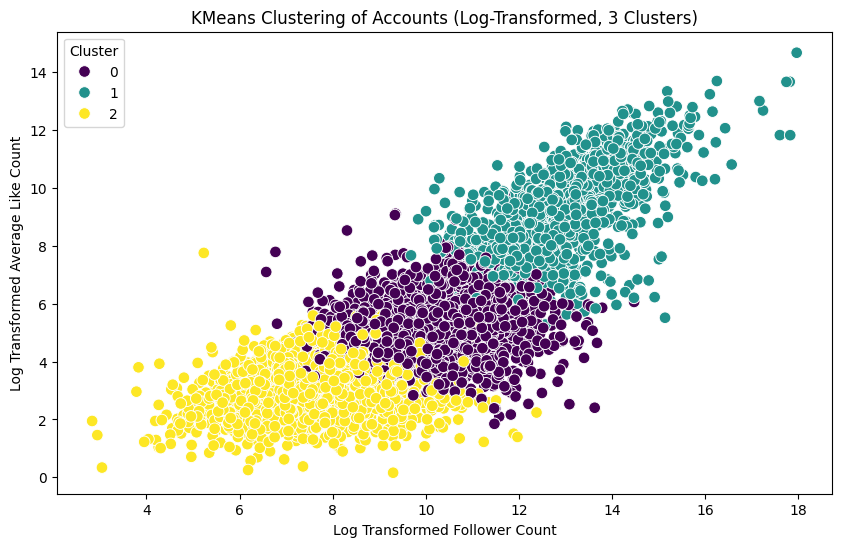

,username,like_count_mean,like_count_sum,comments_count_mean,comments_count_sum,category_enum,is_verified,is_business_account,follower_count,following_count,posts_per_day,days_active,follower_count_log,like_count_mean_log,comments_count_sum_log,cluster
0,01burdaavm,28.485724,997.0,1.200000,42.00001,238,0,1,34861,14,0.897436,39.0,10.459153,3.383906,3.761200,0
1,1001sanat,20.657153,723.0,0.485714,17.00001,250,0,1,11146,7,0.466667,75.0,9.318926,3.075336,2.890372,2
2,10burdaavm,36.714296,1285.0,0.171429,6.00001,238,0,0,35945,125,1.093750,32.0,10.489773,3.630039,1.945912,2
3,140journos,13391.571439,468705.0,135.657143,4748.00001,238,1,0,234739,0,0.122378,286.0,12.366234,9.502455,8.465689,1
4,16roof,75.142867,2630.0,0.571429,20.00001,292,0,1,38555,6,0.380435,92.0,10.559867,4.332611,3.044523,0


In [59]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Add a minimal value to avoid log(0)
aggregated_posts['like_count_mean'] += 1e-5
aggregated_posts['comments_count_sum'] += 1e-5

# Apply log transformation to follower count, like count, and comment count
aggregated_posts['follower_count_log'] = np.log1p(aggregated_posts['follower_count'])
aggregated_posts['like_count_mean_log'] = np.log1p(aggregated_posts['like_count_mean'])
aggregated_posts['comments_count_sum_log'] = np.log1p(aggregated_posts['comments_count_sum'])

# Select log-transformed features for clustering
X_log = aggregated_posts[['follower_count_log', 'like_count_mean_log', 'comments_count_sum_log']]

# Scale the features to standardize the data
scaler = StandardScaler()
X_scaled_log = scaler.fit_transform(X_log)

# Apply KMeans clustering with 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42)
aggregated_posts['cluster'] = kmeans_3.fit_predict(X_scaled_log)

# Visualize cluster sizes
cluster_counts_3 = aggregated_posts['cluster'].value_counts()
print(cluster_counts_3)

# Visualize clusters without PCA (directly on follower count and like count)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=aggregated_posts['follower_count_log'],
    y=aggregated_posts['like_count_mean_log'],
    hue=aggregated_posts['cluster'],
    palette='viridis',
    s=70
)
plt.title('KMeans Clustering of Accounts (Log-Transformed, 3 Clusters)')
plt.xlabel('Log Transformed Follower Count')
plt.ylabel('Log Transformed Average Like Count')
plt.legend(title='Cluster')
plt.show()

# Divide the dataset into three clusters
cluster_0 = aggregated_posts[aggregated_posts['cluster'] == 0]
cluster_1 = aggregated_posts[aggregated_posts['cluster'] == 1]
cluster_2 = aggregated_posts[aggregated_posts['cluster'] == 2]

# Display a few rows to verify cluster assignment
aggregated_posts.head()


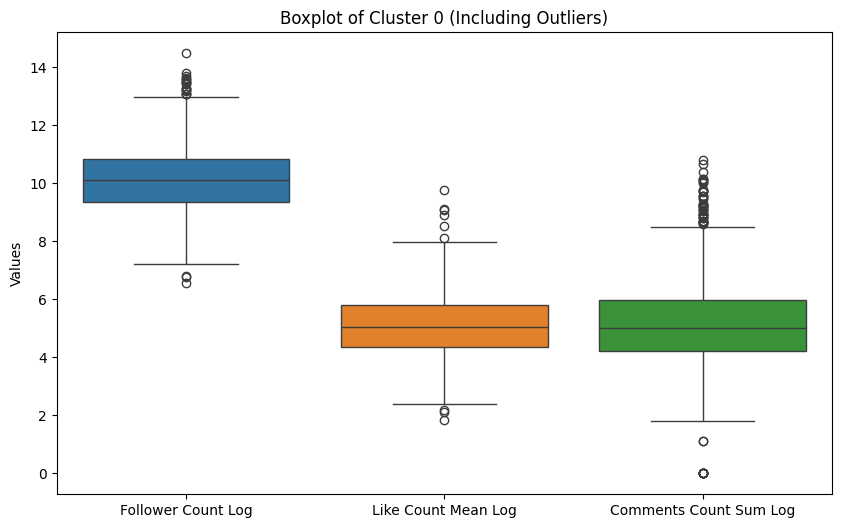

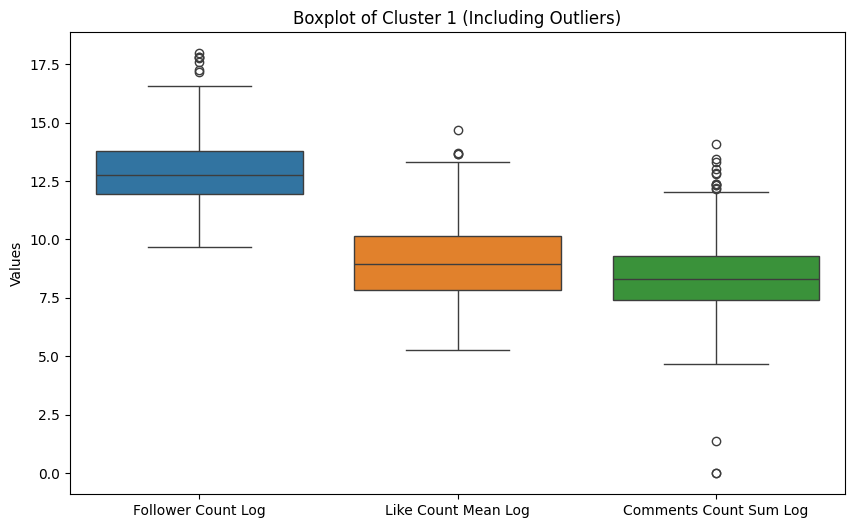

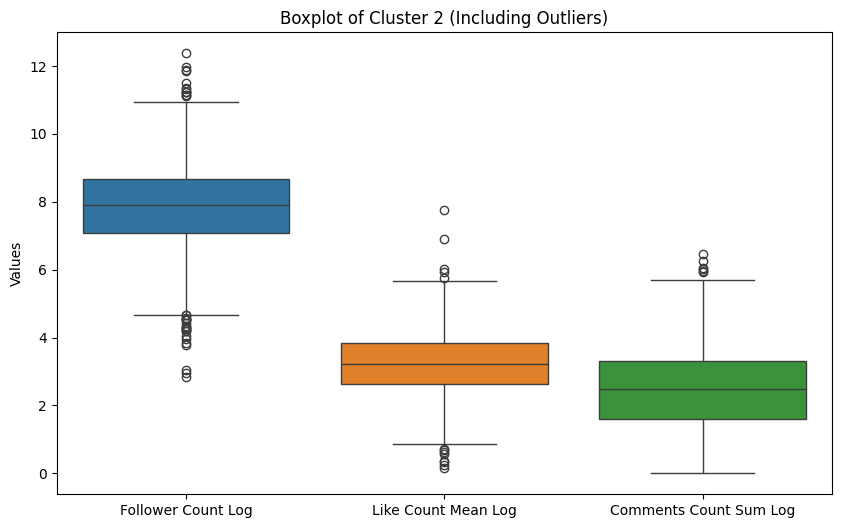

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplots for Cluster 0 (with outliers visible)
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=cluster_0[['follower_count_log', 'like_count_mean_log', 'comments_count_sum_log']]
)
plt.title('Boxplot of Cluster 0 (Including Outliers)')
plt.ylabel('Values')
plt.xticks([0, 1, 2], ['Follower Count Log', 'Like Count Mean Log', 'Comments Count Sum Log'])
plt.show()

# Plot boxplots for Cluster 1 (with outliers visible)
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=cluster_1[['follower_count_log', 'like_count_mean_log', 'comments_count_sum_log']]
)
plt.title('Boxplot of Cluster 1 (Including Outliers)')
plt.ylabel('Values')
plt.xticks([0, 1, 2], ['Follower Count Log', 'Like Count Mean Log', 'Comments Count Sum Log'])
plt.show()

# Plot boxplots for Cluster 2 (with outliers visible)
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=cluster_2[['follower_count_log', 'like_count_mean_log', 'comments_count_sum_log']]
)
plt.title('Boxplot of Cluster 2 (Including Outliers)')
plt.ylabel('Values')
plt.xticks([0, 1, 2], ['Follower Count Log', 'Like Count Mean Log', 'Comments Count Sum Log'])
plt.show()


In [61]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Log transform and scale the data
aggregated_posts['follower_count_log'] = np.log1p(aggregated_posts['follower_count'])
aggregated_posts['like_count_mean_log'] = np.log1p(aggregated_posts['like_count_mean'])
aggregated_posts['comments_count_sum_log'] = np.log1p(aggregated_posts['comments_count_sum'])

X_log = aggregated_posts[['follower_count_log', 'like_count_mean_log', 'comments_count_sum_log']]
scaler = StandardScaler()
X_scaled_log = scaler.fit_transform(X_log)

# Apply KMeans clustering with 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42)
aggregated_posts['cluster'] = kmeans_3.fit_predict(X_scaled_log)

# Drop unnecessary columns to keep log-transformed features
aggregated_posts.drop(
    ['follower_count', 'comments_count_sum', 'like_count_sum', 'comments_count_mean', 'like_count_mean'],
    axis=1,
    inplace=True
)

# Divide into clusters
cluster_0 = aggregated_posts[aggregated_posts['cluster'] == 0]
cluster_1 = aggregated_posts[aggregated_posts['cluster'] == 1]
cluster_2 = aggregated_posts[aggregated_posts['cluster'] == 2]

# Calculate IQR for each feature in Cluster 0
Q1_0 = cluster_0[['follower_count_log', 'like_count_mean_log', 'comments_count_sum_log']].quantile(0.25)
Q3_0 = cluster_0[['follower_count_log', 'like_count_mean_log', 'comments_count_sum_log']].quantile(0.75)
IQR_0 = Q3_0 - Q1_0

# Define outliers for Cluster 0
outliers_0 = ((cluster_0[['follower_count_log', 'like_count_mean_log', 'comments_count_sum_log']] < (Q1_0 - 1.5 * IQR_0)) |
              (cluster_0[['follower_count_log', 'like_count_mean_log', 'comments_count_sum_log']] > (Q3_0 + 1.5 * IQR_0))).any(axis=1)

# Calculate IQR for each feature in Cluster 1
Q1_1 = cluster_1[['follower_count_log', 'like_count_mean_log', 'comments_count_sum_log']].quantile(0.25)
Q3_1 = cluster_1[['follower_count_log', 'like_count_mean_log', 'comments_count_sum_log']].quantile(0.75)
IQR_1 = Q3_1 - Q1_1

# Define outliers for Cluster 1
outliers_1 = ((cluster_1[['follower_count_log', 'like_count_mean_log', 'comments_count_sum_log']] < (Q1_1 - 1.5 * IQR_1)) |
              (cluster_1[['follower_count_log', 'like_count_mean_log', 'comments_count_sum_log']] > (Q3_1 + 1.5 * IQR_1))).any(axis=1)

# Calculate IQR for each feature in Cluster 2
Q1_2 = cluster_2[['follower_count_log', 'like_count_mean_log', 'comments_count_sum_log']].quantile(0.25)
Q3_2 = cluster_2[['follower_count_log', 'like_count_mean_log', 'comments_count_sum_log']].quantile(0.75)
IQR_2 = Q3_2 - Q1_2

# Define outliers for Cluster 2
outliers_2 = ((cluster_2[['follower_count_log', 'like_count_mean_log', 'comments_count_sum_log']] < (Q1_2 - 1.5 * IQR_2)) |
              (cluster_2[['follower_count_log', 'like_count_mean_log', 'comments_count_sum_log']] > (Q3_2 + 1.5 * IQR_2))).any(axis=1)

# Count the number of outliers in each cluster
num_outliers_0 = outliers_0.sum()
num_outliers_1 = outliers_1.sum()
num_outliers_2 = outliers_2.sum()

print(f"Number of outliers in Cluster 0: {num_outliers_0}")
print(f"Number of outliers in Cluster 1: {num_outliers_1}")
print(f"Number of outliers in Cluster 2: {num_outliers_2}")


Number of outliers in Cluster 0: 84
Number of outliers in Cluster 1: 19
Number of outliers in Cluster 2: 53


In [62]:
# Calculate IQR for outlier detection
Q1_0 = cluster_0[['follower_count_log', 'like_count_mean_log', 'comments_count_sum_log']].quantile(0.25)
Q3_0 = cluster_0[['follower_count_log', 'like_count_mean_log', 'comments_count_sum_log']].quantile(0.75)
IQR_0 = Q3_0 - Q1_0

Q1_1 = cluster_1[['follower_count_log', 'like_count_mean_log', 'comments_count_sum_log']].quantile(0.25)
Q3_1 = cluster_1[['follower_count_log', 'like_count_mean_log', 'comments_count_sum_log']].quantile(0.75)
IQR_1 = Q3_1 - Q1_1

Q1_2 = cluster_2[['follower_count_log', 'like_count_mean_log', 'comments_count_sum_log']].quantile(0.25)
Q3_2 = cluster_2[['follower_count_log', 'like_count_mean_log', 'comments_count_sum_log']].quantile(0.75)
IQR_2 = Q3_2 - Q1_2

# Define outlier bounds
lower_bound_0 = Q1_0 - 1.5 * IQR_0
upper_bound_0 = Q3_0 + 1.5 * IQR_0

lower_bound_1 = Q1_1 - 1.5 * IQR_1
upper_bound_1 = Q3_1 + 1.5 * IQR_1

lower_bound_2 = Q1_2 - 1.5 * IQR_2
upper_bound_2 = Q3_2 + 1.5 * IQR_2

# Filter out outliers in Cluster 0
cluster_0_clean = cluster_0[
    ~((cluster_0[['follower_count_log', 'like_count_mean_log', 'comments_count_sum_log']] < lower_bound_0) |
      (cluster_0[['follower_count_log', 'like_count_mean_log', 'comments_count_sum_log']] > upper_bound_0)).any(axis=1)
]

# Filter out outliers in Cluster 1
cluster_1_clean = cluster_1[
    ~((cluster_1[['follower_count_log', 'like_count_mean_log', 'comments_count_sum_log']] < lower_bound_1) |
      (cluster_1[['follower_count_log', 'like_count_mean_log', 'comments_count_sum_log']] > upper_bound_1)).any(axis=1)
]

# Filter out outliers in Cluster 2
cluster_2_clean = cluster_2[
    ~((cluster_2[['follower_count_log', 'like_count_mean_log', 'comments_count_sum_log']] < lower_bound_2) |
      (cluster_2[['follower_count_log', 'like_count_mean_log', 'comments_count_sum_log']] > upper_bound_2)).any(axis=1)
]

# Display the size of clusters before and after outlier removal
print(f"Cluster 0 - Original Size: {len(cluster_0)} | Cleaned Size: {len(cluster_0_clean)}")
print(f"Cluster 1 - Original Size: {len(cluster_1)} | Cleaned Size: {len(cluster_1_clean)}")
print(f"Cluster 2 - Original Size: {len(cluster_2)} | Cleaned Size: {len(cluster_2_clean)}")


Cluster 0 - Original Size: 2166 | Cleaned Size: 2082
Cluster 1 - Original Size: 1009 | Cleaned Size: 990
Cluster 2 - Original Size: 2216 | Cleaned Size: 2163


In [63]:
print(len(outliers_0), len(outliers_1))

2166 1009


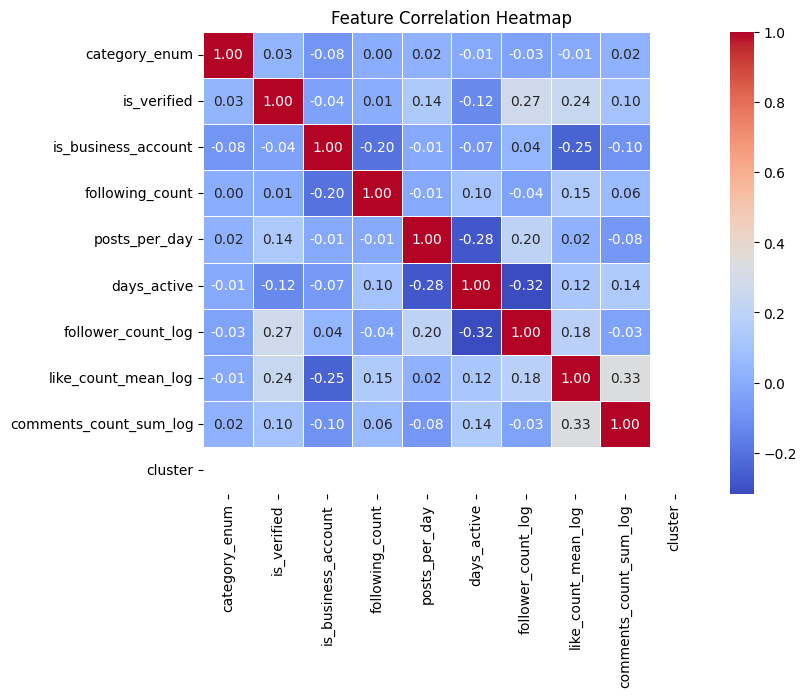

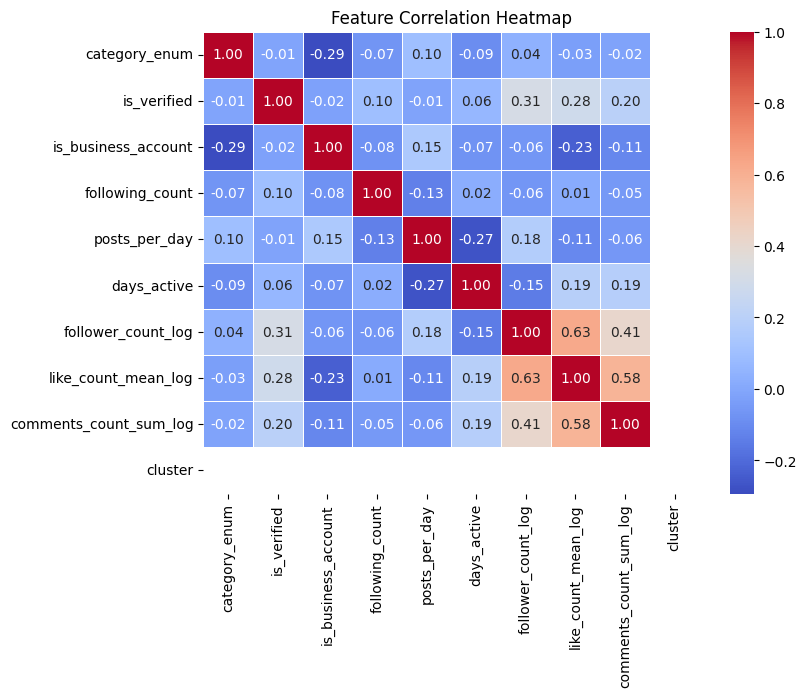

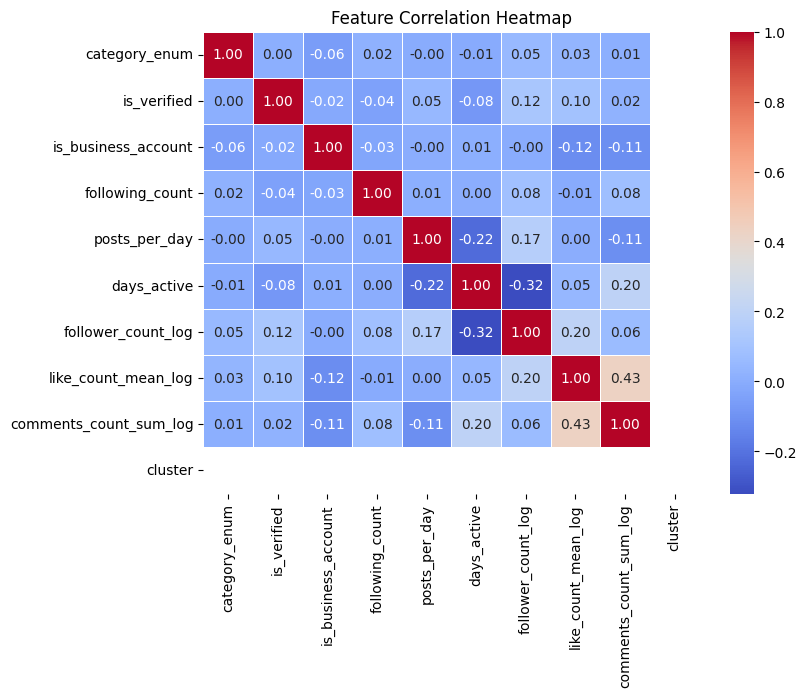

In [64]:
 # Calculate correlation matrix
temp_df = cluster_0.drop(columns=['username'])
correlation_matrix = temp_df.corr()

# Extract correlation with 'like_count_mean'
correlation_with_likes = correlation_matrix['like_count_mean_log'].sort_values(ascending=False)

# Visualize the correlation as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

temp_df = cluster_1.drop(columns=['username'])
correlation_matrix = temp_df.corr()

# Extract correlation with 'like_count_mean'
correlation_with_likes = correlation_matrix['like_count_mean_log'].sort_values(ascending=False)

# Visualize the correlation as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

temp_df = cluster_2.drop(columns=['username'])
correlation_matrix = temp_df.corr()

# Extract correlation with 'like_count_mean'
correlation_with_likes = correlation_matrix['like_count_mean_log'].sort_values(ascending=False)

# Visualize the correlation as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


In [65]:
def log_mse_like_counts(y_true, y_pred):
  """
  Calculate the Log Mean Squared Error (Log MSE) for like counts (log(like_count + 1)).

  Parameters:
  - y_true: array-like, actual like counts
  - y_pred: array-like, predicted like counts

  Returns:
  - log_mse: float, Log Mean Squared Error
  """
  # Ensure inputs are numpy arrays
  y_true = np.array(y_true)
  y_pred = np.array(y_pred)

  # Log transformation: log(like_count + 1)
  log_y_true = np.log1p(y_true)
  log_y_pred = np.log1p(y_pred)

  # Compute squared errors
  squared_errors = (log_y_true - log_y_pred) ** 2

  # Return the mean of squared errors
  return np.mean(squared_errors)

# Test Dataset Analysis

In [66]:
test_file_path = "/content/test-regression-round2.jsonl"

test_data = []
with open(test_file_path, "r", encoding="utf-8") as file:
    for line in file:
        try:
            json_object = json.loads(line.strip())
            test_data.append(json_object)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")

test_df = pd.DataFrame(test_data)
test_df.head()

,caption,comments_count,id,media_type,media_url,timestamp,username
0,Zirvede online 🏂🏔,3,17903451397703117,IMAGE,https://scontent-sof1-1.cdninstagram.com/v/t51...,2021-02-02 14:31:34,cemozkaynak
1,Volkswagen Passat B8 orijinal görünümlü ambiya...,63,17896404506845900,VIDEO,https://scontent-sof1-2.cdninstagram.com/o1/v/...,2023-11-23 14:04:45,uzmananahtar
2,#grwn ✌🏻🤓,27,17853971531941549,VIDEO,None,2023-03-29 18:18:23,furkanncagman
3,🦍,125,18362044393058713,CAROUSEL_ALBUM,https://scontent-sof1-1.cdninstagram.com/v/t51...,2023-04-19 17:28:00,ozanyigitt
4,2 Gün Abu Dabi’yi gezdik. Eylül ortası olmasın...,108,17999365834969022,CAROUSEL_ALBUM,https://scontent-sof1-2.cdninstagram.com/v/t51...,2023-09-22 08:17:19,rotasizseyyah


In [67]:
formatted_test_data = []

for i in test_df["username"]:
    if i in aggregated_posts["username"].values:
        temp_row = aggregated_posts.loc[aggregated_posts["username"] == i]
        temp_row = temp_row.drop(columns=['like_count_mean_log'])

        temp_row['id'] = test_df.loc[test_df["username"] == i]['id'].values[0]
        temp_row['username'] = test_df.loc[test_df["username"] == i]['username'].values[0]
        formatted_test_data.append(temp_row)


formatted_test_df = pd.concat(formatted_test_data, ignore_index=True)
formatted_test_df["like_count_mean_log"] = 0  # Placeholder for prediction



test_cluster_0 = formatted_test_df.loc[formatted_test_df["cluster"] == 0]
test_cluster_1 = formatted_test_df.loc[formatted_test_df["cluster"] == 1]
test_cluster_2 = formatted_test_df.loc[formatted_test_df["cluster"] == 2]



In [68]:
test_cluster_0.head()

,username,category_enum,is_verified,is_business_account,following_count,posts_per_day,days_active,follower_count_log,comments_count_sum_log,cluster,id,like_count_mean_log
0,cemozkaynak,252,1,1,744,0.014614,2395.0,9.275847,5.730100,0,17903451397703117,0
5,refahist,268,1,1,7,4.375000,8.0,9.849243,3.912023,0,18020868037872253,0
7,handeledim,238,0,0,2312,0.327103,107.0,10.599181,6.359574,0,18019742449567154,0
9,onurkuyumcu1919,194,0,1,1752,0.172414,203.0,8.821732,3.828642,0,18006379492926193,0
11,lutfusavas,269,1,1,51,3.500000,10.0,11.795620,6.274762,0,18025264618764141,0


# Train the Training Dataset

In [69]:
cluster_2.head()

,username,category_enum,is_verified,is_business_account,following_count,posts_per_day,days_active,follower_count_log,like_count_mean_log,comments_count_sum_log,cluster
1,1001sanat,250,0,1,7,0.466667,75.0,9.318926,3.075336,2.890372,2
2,10burdaavm,238,0,0,125,1.093750,32.0,10.489773,3.630039,1.945912,2
5,16tarim,8,0,1,1017,0.282258,124.0,8.032685,3.040433,1.945912,2
8,1dil1insan,124,0,1,151,0.081967,427.0,6.267201,2.856471,3.178054,2
12,24saatteis,238,0,0,699,0.393258,89.0,9.769041,2.935376,2.079443,2


In [70]:
def log_mse_like_counts(y_true, y_pred):
    return np.sum((np.log1p(y_true) - np.log1p(y_pred)) ** 2) / len(y_true)

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

# Drop 'username' if necessary
cluster_0 = cluster_0.drop(columns=['username'])
cluster_1 = cluster_1.drop(columns=['username'])
cluster_2 = cluster_2.drop(columns=['username'])

# Split Cluster 0 into train (70%), validation (15%), and test (15%)
X_0_features = cluster_0.drop(columns=['like_count_mean_log'])
y_0_target = cluster_0['like_count_mean_log']

X_0_train, X_0_temp, y_0_train, y_0_temp = train_test_split(
    X_0_features, y_0_target, test_size=0.3, random_state=42
)
X_0_val, X_0_test, y_0_val, y_0_test = train_test_split(
    X_0_temp, y_0_temp, test_size=0.5, random_state=42
)

# Split Cluster 1 into train (70%), validation (15%), and test (15%)
X_1_features = cluster_1.drop(columns=['like_count_mean_log'])
y_1_target = cluster_1['like_count_mean_log']

X_1_train, X_1_temp, y_1_train, y_1_temp = train_test_split(
    X_1_features, y_1_target, test_size=0.3, random_state=42
)
X_1_val, X_1_test, y_1_val, y_1_test = train_test_split(
    X_1_temp, y_1_temp, test_size=0.5, random_state=42
)

# Split Cluster 2 into train (70%), validation (15%), and test (15%)
X_2_features = cluster_2.drop(columns=['like_count_mean_log'])
y_2_target = cluster_2['like_count_mean_log']

X_2_train, X_2_temp, y_2_train, y_2_temp = train_test_split(
    X_2_features, y_2_target, test_size=0.3, random_state=42
)
X_2_val, X_2_test, y_2_val, y_2_test = train_test_split(
    X_2_temp, y_2_temp, test_size=0.5, random_state=42
)

# Initialize Random Forest models for all clusters
model_0 = RandomForestRegressor(n_estimators=150, max_depth=6, random_state=42)
model_1 = RandomForestRegressor(n_estimators=100, max_depth=6, random_state=42)
model_2 = RandomForestRegressor(n_estimators=150, max_depth=6, random_state=42)

# Perform 10-fold cross-validation for Cluster 0
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores_0 = cross_val_score(model_0, X_0_train, y_0_train, cv=kf, scoring='neg_mean_squared_error')
cv_scores_1 = cross_val_score(model_1, X_1_train, y_1_train, cv=kf, scoring='neg_mean_squared_error')
cv_scores_2 = cross_val_score(model_2, X_2_train, y_2_train, cv=kf, scoring='neg_mean_squared_error')

print(f"Cluster 0 - Mean MSE (10-fold CV): {np.mean(np.abs(cv_scores_0))}")
print(f"Cluster 1 - Mean MSE (10-fold CV): {np.mean(np.abs(cv_scores_1))}")
print(f"Cluster 2 - Mean MSE (10-fold CV): {np.mean(np.abs(cv_scores_2))}")

# Train the models on the full training dataset
model_0.fit(X_0_train, y_0_train)
model_1.fit(X_1_train, y_1_train)
model_2.fit(X_2_train, y_2_train)

# Evaluate on training datasets
train_pred_0 = model_0.predict(X_0_train)
train_pred_1 = model_1.predict(X_1_train)
train_pred_2 = model_2.predict(X_2_train)

# Inverse log transform (exp) and set negative predictions to 0
train_pred_0 = np.maximum(np.expm1(train_pred_0), 0)
train_pred_1 = np.maximum(np.expm1(train_pred_1), 0)
train_pred_2 = np.maximum(np.expm1(train_pred_2), 0)
y_0_train_exp = np.expm1(y_0_train)
y_1_train_exp = np.expm1(y_1_train)
y_2_train_exp = np.expm1(y_2_train)

# Define custom log error calculation (sum of absolute log errors)
def log_error_like_counts(y_true, y_pred):
    return np.sum(np.abs(np.log1p(y_true) - np.log1p(y_pred)))

# Apply the custom error function
train_log_error_0 = log_error_like_counts(y_0_train_exp, train_pred_0)
train_log_error_1 = log_error_like_counts(y_1_train_exp, train_pred_1)
train_log_error_2 = log_error_like_counts(y_2_train_exp, train_pred_2)

# Evaluate on validation datasets
val_pred_0 = model_0.predict(X_0_val)
val_pred_1 = model_1.predict(X_1_val)
val_pred_2 = model_2.predict(X_2_val)

val_pred_0 = np.maximum(np.expm1(val_pred_0), 0)
val_pred_1 = np.maximum(np.expm1(val_pred_1), 0)
val_pred_2 = np.maximum(np.expm1(val_pred_2), 0)
y_0_val_exp = np.expm1(y_0_val)
y_1_val_exp = np.expm1(y_1_val)
y_2_val_exp = np.expm1(y_2_val)

val_log_error_0 = log_error_like_counts(y_0_val_exp, val_pred_0)
val_log_error_1 = log_error_like_counts(y_1_val_exp, val_pred_1)
val_log_error_2 = log_error_like_counts(y_2_val_exp, val_pred_2)

# Evaluate on test datasets
test_pred_0 = model_0.predict(X_0_test)
test_pred_1 = model_1.predict(X_1_test)
test_pred_2 = model_2.predict(X_2_test)

test_pred_0 = np.maximum(np.expm1(test_pred_0), 0)
test_pred_1 = np.maximum(np.expm1(test_pred_1), 0)
test_pred_2 = np.maximum(np.expm1(test_pred_2), 0)
y_0_test_exp = np.expm1(y_0_test)
y_1_test_exp = np.expm1(y_1_test)
y_2_test_exp = np.expm1(y_2_test)

test_log_error_0 = log_error_like_counts(y_0_test_exp, test_pred_0)
test_log_error_1 = log_error_like_counts(y_1_test_exp, test_pred_1)
test_log_error_2 = log_error_like_counts(y_2_test_exp, test_pred_2)

# Print train, validation, and test log errors
print(f"\nCluster 0 - Train Sum of Log Errors: {train_log_error_0}")
print(f"Cluster 0 - Validation Sum of Log Errors: {val_log_error_0}")
print(f"Cluster 0 - Test Sum of Log Errors: {test_log_error_0}")

print(f"\nCluster 1 - Train Sum of Log Errors: {train_log_error_1}")
print(f"Cluster 1 - Validation Sum of Log Errors: {val_log_error_1}")
print(f"Cluster 1 - Test Sum of Log Errors: {test_log_error_1}")

print(f"\nCluster 2 - Train Sum of Log Errors: {train_log_error_2}")
print(f"Cluster 2 - Validation Sum of Log Errors: {val_log_error_2}")
print(f"Cluster 2 - Test Sum of Log Errors: {test_log_error_2}")


Cluster 0 - Mean MSE (10-fold CV): 0.6949867082778928
Cluster 1 - Mean MSE (10-fold CV): 0.8620815842442244
Cluster 2 - Mean MSE (10-fold CV): 0.5489612996214659

Cluster 0 - Train Sum of Log Errors: 826.6070347236424
Cluster 0 - Validation Sum of Log Errors: 204.14418404592251
Cluster 0 - Test Sum of Log Errors: 219.33277227683698

Cluster 1 - Train Sum of Log Errors: 370.71274590531954
Cluster 1 - Validation Sum of Log Errors: 109.68319007463546
Cluster 1 - Test Sum of Log Errors: 100.42707901214723

Cluster 2 - Train Sum of Log Errors: 764.1979512278133
Cluster 2 - Validation Sum of Log Errors: 181.06928216722795
Cluster 2 - Test Sum of Log Errors: 189.33236209498926


# Test Data Prediction

In [72]:
# ====== Predict Test Data ======
test_cluster_0_names = test_cluster_0['username']
test_cluster_0_ids = test_cluster_0['id']
test_cluster_0 = test_cluster_0.drop(columns=['username', 'id', 'like_count_mean_log'])

test_cluster_1_names = test_cluster_1['username']
test_cluster_1_ids = test_cluster_1['id']
test_cluster_1 = test_cluster_1.drop(columns=['username', 'id', 'like_count_mean_log'])

test_cluster_2_names = test_cluster_2['username']
test_cluster_2_ids = test_cluster_2['id']
test_cluster_2 = test_cluster_2.drop(columns=['username', 'id', 'like_count_mean_log'])

predicted_likes_0 = model_0.predict(test_cluster_0)
predicted_likes_0 = np.maximum(predicted_likes_0, 0)  # Ensure no negative predictions
predicted_likes_0 = np.expm1(predicted_likes_0)  # Inverse log transformation

predicted_likes_1 = model_1.predict(test_cluster_1)
predicted_likes_1 = np.maximum(predicted_likes_1, 0)  # Ensure no negative predictions
predicted_likes_1 = np.expm1(predicted_likes_1)  # Inverse log transformation

predicted_likes_2 = model_2.predict(test_cluster_2)
predicted_likes_2 = np.maximum(predicted_likes_2, 0)  # Ensure no negative predictions
predicted_likes_2 = np.expm1(predicted_likes_2)  # Inverse log transformation

# ====== Save Predictions to JSON ======
output_dict = {}
output_path = "/content/prediction-regression-round2.json"

for i in range(len(test_cluster_0_ids)):
    output_dict[str(test_cluster_0_ids.iloc[i])] = int(predicted_likes_0[i])

for i in range(len(test_cluster_1_ids)):
    output_dict[str(test_cluster_1_ids.iloc[i])] = int(predicted_likes_1[i])

for i in range(len(test_cluster_2_ids)):
    output_dict[str(test_cluster_2_ids.iloc[i])] = int(predicted_likes_2[i])

with open(output_path, "w") as of:
    json.dump(output_dict, of, indent=4)

print(f"Predictions saved successfully to {output_path}!")


Predictions saved successfully to /content/prediction-regression-round2.json!


In [73]:
pprint(output_dict)

{'17842125969098625': 21,
 '17842133421053680': 17,
 '17842262878347614': 29,
 '17842536582014367': 19,
 '17842616685097835': 46,
 '17842698372057811': 27,
 '17842843491082799': 106,
 '17842964729217076': 53,
 '17842971761056319': 114,
 '17843011057181888': 45,
 '17843911590088401': 50,
 '17843914980035156': 70,
 '17844053652063317': 600,
 '17844113249230178': 9,
 '17844150115795324': 128,
 '17844197268085344': 117,
 '17844304338099142': 6845,
 '17844425537880934': 328,
 '17844437155305173': 45,
 '17844438131457959': 8,
 '17844573736118484': 12,
 '17845148913054711': 34,
 '17845290365889769': 24,
 '17845321360490579': 25,
 '17845574133093613': 120,
 '17845625072592235': 44,
 '17845713315070947': 141,
 '17846057727068087': 92,
 '17846418540053860': 61,
 '17846468333175606': 41626,
 '17846613890183781': 50,
 '17846617312891802': 202,
 '17846810796093875': 46,
 '17846946897053786': 45,
 '17847341364055961': 103,
 '17847481089011752': 25,
 '17847600461892145': 12,
 '17847671346081559': 175